In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import mixture
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
df = pd.read_csv('../raw_data/teste_argo_data.csv')

In [3]:
df

,x,y,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
0,51.582001,-45.755001,5.681237,5.683842,5.603836,5.518481,5.438179,5.358996,5.299932,5.243129,...,2.495287,2.492187,2.491260,2.490473,2.489686,2.488898,2.488111,2.487324,2.486536,2.485749
1,92.547997,-43.222000,10.326000,10.326000,10.326000,10.326098,10.328574,10.331011,10.331514,10.332000,...,5.563226,5.486413,5.446694,5.406974,5.367255,5.327535,5.287816,5.248096,5.208376,5.168657
2,89.600998,-56.223000,2.383455,2.381051,2.383966,2.386997,2.388578,2.390099,2.391089,2.392000,...,1.955992,1.952437,1.946748,1.941059,1.935370,1.929681,1.923992,1.918303,1.912614,1.906924
3,115.977997,-45.905998,9.729325,9.714897,9.688203,9.658428,9.637267,9.616872,9.606910,9.598658,...,5.321880,5.270394,5.228471,5.188967,5.149464,5.109960,5.070456,5.030951,4.991447,4.951944
4,64.942001,-50.344002,5.158442,5.158958,5.159000,5.159000,5.159450,5.159940,5.160888,5.161898,...,2.364662,2.364060,2.362651,2.361151,2.359651,2.358151,2.356651,2.355152,2.353652,2.352152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-39.964000,-38.967000,16.596121,16.565039,16.456429,16.412775,16.380226,16.339870,16.311058,16.280241,...,3.860535,3.858713,3.856145,3.841860,3.827575,3.813290,3.799005,3.784720,3.770435,3.756150
2841,-42.367000,-39.641000,20.193810,20.202423,20.205034,20.205944,20.205999,20.206173,20.207926,20.208000,...,3.731355,3.711967,3.692580,3.678507,3.664907,3.651306,3.637705,3.624104,3.610504,3.596903
2842,138.729000,-63.489000,-0.475158,-0.500516,-0.517110,-0.522902,-0.534635,-0.534569,-0.561638,-0.579545,...,1.545980,1.543271,1.540698,1.537072,1.534201,1.532202,1.528509,1.522929,1.517234,1.510901
2843,82.050000,-61.522000,-0.202319,-0.380112,-0.466284,-0.479081,-0.492424,-0.513382,-0.775031,-1.213569,...,1.474192,1.470694,1.465577,1.462389,1.458191,1.451691,1.448193,1.443691,1.439381,1.435694


In [4]:
pres = df.columns[2:].values

In [5]:
lon = df.iloc[:,0].values
lat = df.iloc[:,1].values

In [6]:
X = df.iloc[:,2:].values

In [7]:
X.shape

(2845, 194)

In [8]:
Xscaled = preprocessing.scale(X)

In [9]:
pca = PCA()

In [10]:
pca.fit(Xscaled)

PCA()

In [11]:
Xpca = pca.transform(Xscaled)

In [12]:
pca.components_.shape

(194, 194)

In [13]:
X_proj = pd.DataFrame(Xpca, columns=[f'PC{i}' for i in range(1, pca.components_.shape[0]+1)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194
0,-13.800140,-0.088536,-0.802386,0.146713,-0.121145,-0.116634,0.036406,-0.033581,-0.063240,0.021586,...,-0.000048,0.000091,0.000172,-0.000320,-0.000012,0.000070,-0.000030,-0.000207,0.000025,-0.000026
1,12.315478,5.053959,2.486225,0.852012,0.977510,0.109802,0.084285,0.014537,0.014616,0.003140,...,-0.000680,-0.000472,0.000612,0.001808,-0.000810,-0.001604,-0.000195,-0.000178,0.000452,-0.000614
2,-18.002848,0.842774,-0.052298,0.273874,-0.239898,-0.084295,0.210182,-0.062875,0.097927,0.011267,...,0.000325,-0.000903,0.000730,-0.000156,0.000141,-0.000815,0.000077,-0.000989,0.000263,-0.000790
3,9.232282,3.941341,2.121293,0.209725,0.654320,0.059740,-0.094940,-0.001666,-0.022294,-0.102056,...,-0.000129,-0.000358,-0.000015,0.000598,-0.000191,-0.000709,-0.000221,-0.000089,-0.000050,-0.000163
4,-15.660547,0.354678,-1.469497,0.746474,-0.165224,-0.565085,0.260264,-0.024580,-0.032046,0.084464,...,-0.000082,-0.000300,0.000158,-0.000007,0.000068,-0.000109,0.000331,0.000041,0.000245,-0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,5.951216,-8.099486,1.520550,-2.027146,-1.026822,0.450111,0.672357,0.304562,0.110947,-0.140166,...,-0.000008,0.000683,-0.000490,0.000389,-0.001367,-0.000095,0.000465,-0.000451,0.000506,0.000312
2841,6.007221,-9.050296,0.300645,-0.634731,-1.488348,0.699429,1.049598,-0.016103,0.399259,-0.150541,...,0.000059,0.000504,-0.000559,-0.000616,-0.001104,-0.000446,0.000428,-0.000261,0.000669,0.000342
2842,-19.414146,0.376482,1.058597,-0.698458,0.616486,-0.135374,-0.070796,0.251857,-0.067231,0.104113,...,-0.000253,-0.000116,0.001187,0.000383,-0.000252,0.000534,-0.000854,-0.000471,0.000042,-0.001232
2843,-19.574875,0.335495,1.289835,-0.724122,0.713833,0.036828,-0.269456,0.321953,-0.153918,0.107211,...,0.000281,0.000578,-0.000023,0.000354,-0.000093,-0.000273,-0.000462,0.000192,-0.000247,0.000110


<Axes: >

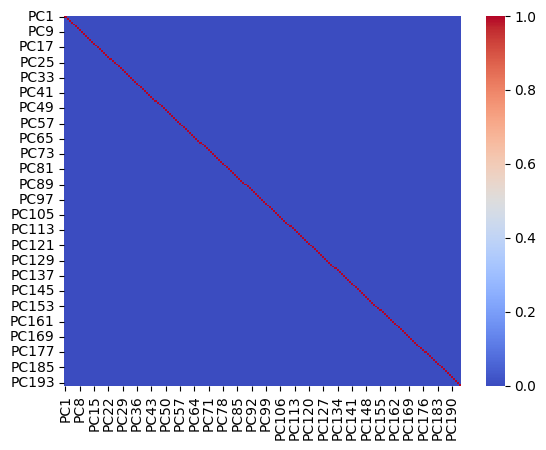

In [14]:
sns.heatmap(X_proj.corr(), cmap='coolwarm')

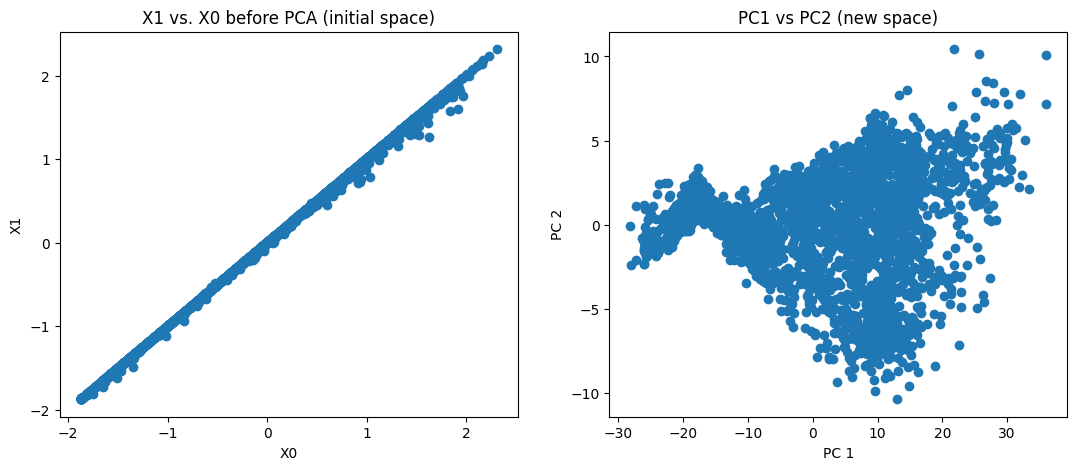

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(Xscaled[:,0], Xscaled[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [16]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", Xscaled.shape)

Shape of W:  (194, 194)
Shape of X (2845, 194)


In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.93309462, 0.98117968, 0.99341957, 0.99660512, 0.9981333 ,
       0.99887451, 0.9992017 , 0.99939186, 0.99951738, 0.99960577,
       0.99967456, 0.99972232, 0.99976212, 0.99979309, 0.99982039,
       0.99984231, 0.99986039, 0.99987606, 0.99988909, 0.99990066,
       0.99991095, 0.99991955, 0.99992689, 0.99993376, 0.99993974,
       0.99994542, 0.99995053, 0.99995486, 0.9999588 , 0.99996203,
       0.99996505, 0.99996767, 0.99996976, 0.99997172, 0.99997355,
       0.99997514, 0.99997672, 0.99997819, 0.99997948, 0.99998067,
       0.9999817 , 0.99998269, 0.99998366, 0.99998455, 0.99998536,
       0.9999861 , 0.99998684, 0.99998753, 0.99998813, 0.99998869,
       0.9999892 , 0.99998971, 0.99999017, 0.9999906 , 0.999991  ,
       0.99999137, 0.99999173, 0.99999208, 0.99999241, 0.99999273,
       0.99999303, 0.99999331, 0.99999358, 0.99999384, 0.99999408,
       0.99999432, 0.99999455, 0.99999477, 0.99999497, 0.99999516,
       0.99999535, 0.99999552, 0.9999957 , 0.99999586, 0.99999

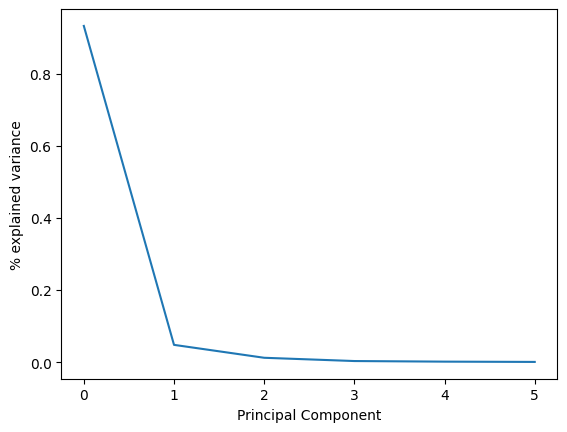

In [18]:
plt.plot(pca.explained_variance_ratio_[0:6])
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [19]:
pca = PCA(n_components=6)
pca.fit(Xscaled)
Xpca = pca.transform(Xscaled)

In [25]:
Xpca

array([[-13.80013955,  -0.08853599,  -0.80238578,   0.14671267,
         -0.12114548,  -0.11663431],
       [ 12.31547822,   5.05395899,   2.48622516,   0.8520118 ,
          0.97750953,   0.10980181],
       [-18.00284811,   0.84277428,  -0.05229804,   0.27387384,
         -0.23989783,  -0.08429489],
       ...,
       [-19.41414575,   0.37648171,   1.05859723,  -0.69845794,
          0.61648581,  -0.13537358],
       [-19.57487524,   0.33549509,   1.28983499,  -0.72412243,
          0.71383291,   0.0368281 ],
       [-18.25568741,   0.2612229 ,   0.17017583,   0.43339874,
         -0.21406286,   0.08189972]])

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

In [22]:
# Instantiate model
model = mixture.GaussianMixture()

param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["full"],
#     "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    model, param_grid=param_grid, scoring=gmm_bic_score, verbose=3
)
grid_search.fit(Xpca)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END covariance_type=full, n_components=2;, score=-12663.289 total time=   0.2s
[CV 2/5] END covariance_type=full, n_components=2;, score=-12376.882 total time=   0.1s
[CV 3/5] END covariance_type=full, n_components=2;, score=-11475.397 total time=   0.1s
[CV 4/5] END covariance_type=full, n_components=2;, score=-11562.191 total time=   0.1s
[CV 5/5] END covariance_type=full, n_components=2;, score=-11473.670 total time=   0.2s
[CV 1/5] END covariance_type=full, n_components=3;, score=-12334.689 total time=   0.1s
[CV 2/5] END covariance_type=full, n_components=3;, score=-11923.488 total time=   0.2s
[CV 3/5] END covariance_type=full, n_components=3;, score=-11489.081 total time=   0.2s
[CV 4/5] END covariance_type=full, n_components=3;, score=-11216.472 total time=   0.2s
[CV 5/5] END covariance_type=full, n_components=3;, score=-11034.899 total time=   0.1s
[CV 1/5] END covariance_type=full, n_components=4;, score=-

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x7ff4c0719090>, verbose=3)

In [23]:
comp_df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
comp_df["mean_test_score"] = -comp_df["mean_test_score"]
comp_df = comp_df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
comp_df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
4,6,full,11412.743380
3,5,full,11439.701431
5,7,full,11480.050819
6,8,full,11542.269702
7,9,full,11549.315663


/home/tobfer/.pyenv/versions/3.10.6/envs/ohw/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


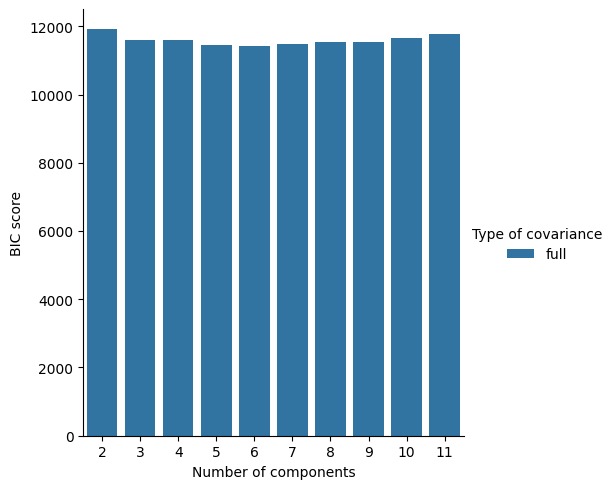

In [24]:
sns.catplot(
    data=comp_df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [25]:
labels = grid_search.predict(Xpca)

In [26]:
# find posterior probabilities (the probabilities of belonging to each class)
posterior_probs = grid_search.predict_proba(Xpca)

In [27]:
# maximum posterior probability (the class is assigned based on this value)
max_posterior_probs = np.max(posterior_probs,axis=1) 

In [28]:
df.shape

(2845, 196)

In [29]:
# put the labels and maximum posterior probabilities back in original dataframe
df.insert(2,'label',labels,True)
df.insert(3,'max posterior prob',max_posterior_probs,True) 
df

,x,y,label,max posterior prob,15.0,20.0,25.0,30.0,35.0,40.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
0,51.582001,-45.755001,2,0.935355,5.681237,5.683842,5.603836,5.518481,5.438179,5.358996,...,2.495287,2.492187,2.491260,2.490473,2.489686,2.488898,2.488111,2.487324,2.486536,2.485749
1,92.547997,-43.222000,1,0.795909,10.326000,10.326000,10.326000,10.326098,10.328574,10.331011,...,5.563226,5.486413,5.446694,5.406974,5.367255,5.327535,5.287816,5.248096,5.208376,5.168657
2,89.600998,-56.223000,0,0.998971,2.383455,2.381051,2.383966,2.386997,2.388578,2.390099,...,1.955992,1.952437,1.946748,1.941059,1.935370,1.929681,1.923992,1.918303,1.912614,1.906924
3,115.977997,-45.905998,1,0.997327,9.729325,9.714897,9.688203,9.658428,9.637267,9.616872,...,5.321880,5.270394,5.228471,5.188967,5.149464,5.109960,5.070456,5.030951,4.991447,4.951944
4,64.942001,-50.344002,2,0.552339,5.158442,5.158958,5.159000,5.159000,5.159450,5.159940,...,2.364662,2.364060,2.362651,2.361151,2.359651,2.358151,2.356651,2.355152,2.353652,2.352152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-39.964000,-38.967000,3,0.999998,16.596121,16.565039,16.456429,16.412775,16.380226,16.339870,...,3.860535,3.858713,3.856145,3.841860,3.827575,3.813290,3.799005,3.784720,3.770435,3.756150
2841,-42.367000,-39.641000,3,1.000000,20.193810,20.202423,20.205034,20.205944,20.205999,20.206173,...,3.731355,3.711967,3.692580,3.678507,3.664907,3.651306,3.637705,3.624104,3.610504,3.596903
2842,138.729000,-63.489000,0,1.000000,-0.475158,-0.500516,-0.517110,-0.522902,-0.534635,-0.534569,...,1.545980,1.543271,1.540698,1.537072,1.534201,1.532202,1.528509,1.522929,1.517234,1.510901
2843,82.050000,-61.522000,0,1.000000,-0.202319,-0.380112,-0.466284,-0.479081,-0.492424,-0.513382,...,1.474192,1.470694,1.465577,1.462389,1.458191,1.451691,1.448193,1.443691,1.439381,1.435694


In [30]:
# group profiles according to label
grouped_unsorted = df.groupby('label')

In [31]:
# calculate mean of all profiles in each class
df_means = grouped_unsorted.mean()

In [32]:
n_comp = grid_search.best_estimator_.n_components

In [33]:
# extrat sea surface temperatures (SSTs)
T15_means = df_means['15.0'].values

# sort mean temperatuer at 15 dbar from coldest to warmest
old2new = np.argsort(T15_means)

# create dictionary object for sorting
di = dict(zip(old2new,range(0,n_comp)))

# add new column to dataframe - sorted label
df.insert(3,'label_sorted',df['label'].map(di))

In [34]:
# group profiles according to label
grouped = df.groupby('label_sorted')

# calculate mean of all profiles in each class
dfg_means = grouped.mean()

# calculate stdevs of all profiles in each class
dfg_stds = grouped.std()

# number or profiles in each class
nprofs = grouped['x'].count().values

In [35]:
print(dfg_means['15.0'])

label_sorted
0     1.194980
1     6.730051
2    11.842235
3    13.337937
4    18.215375
5    18.363629
Name: 15.0, dtype: float64


In [36]:
p = np.asarray([float(i) for i in pres])

/tmp/ipykernel_9503/1080338754.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


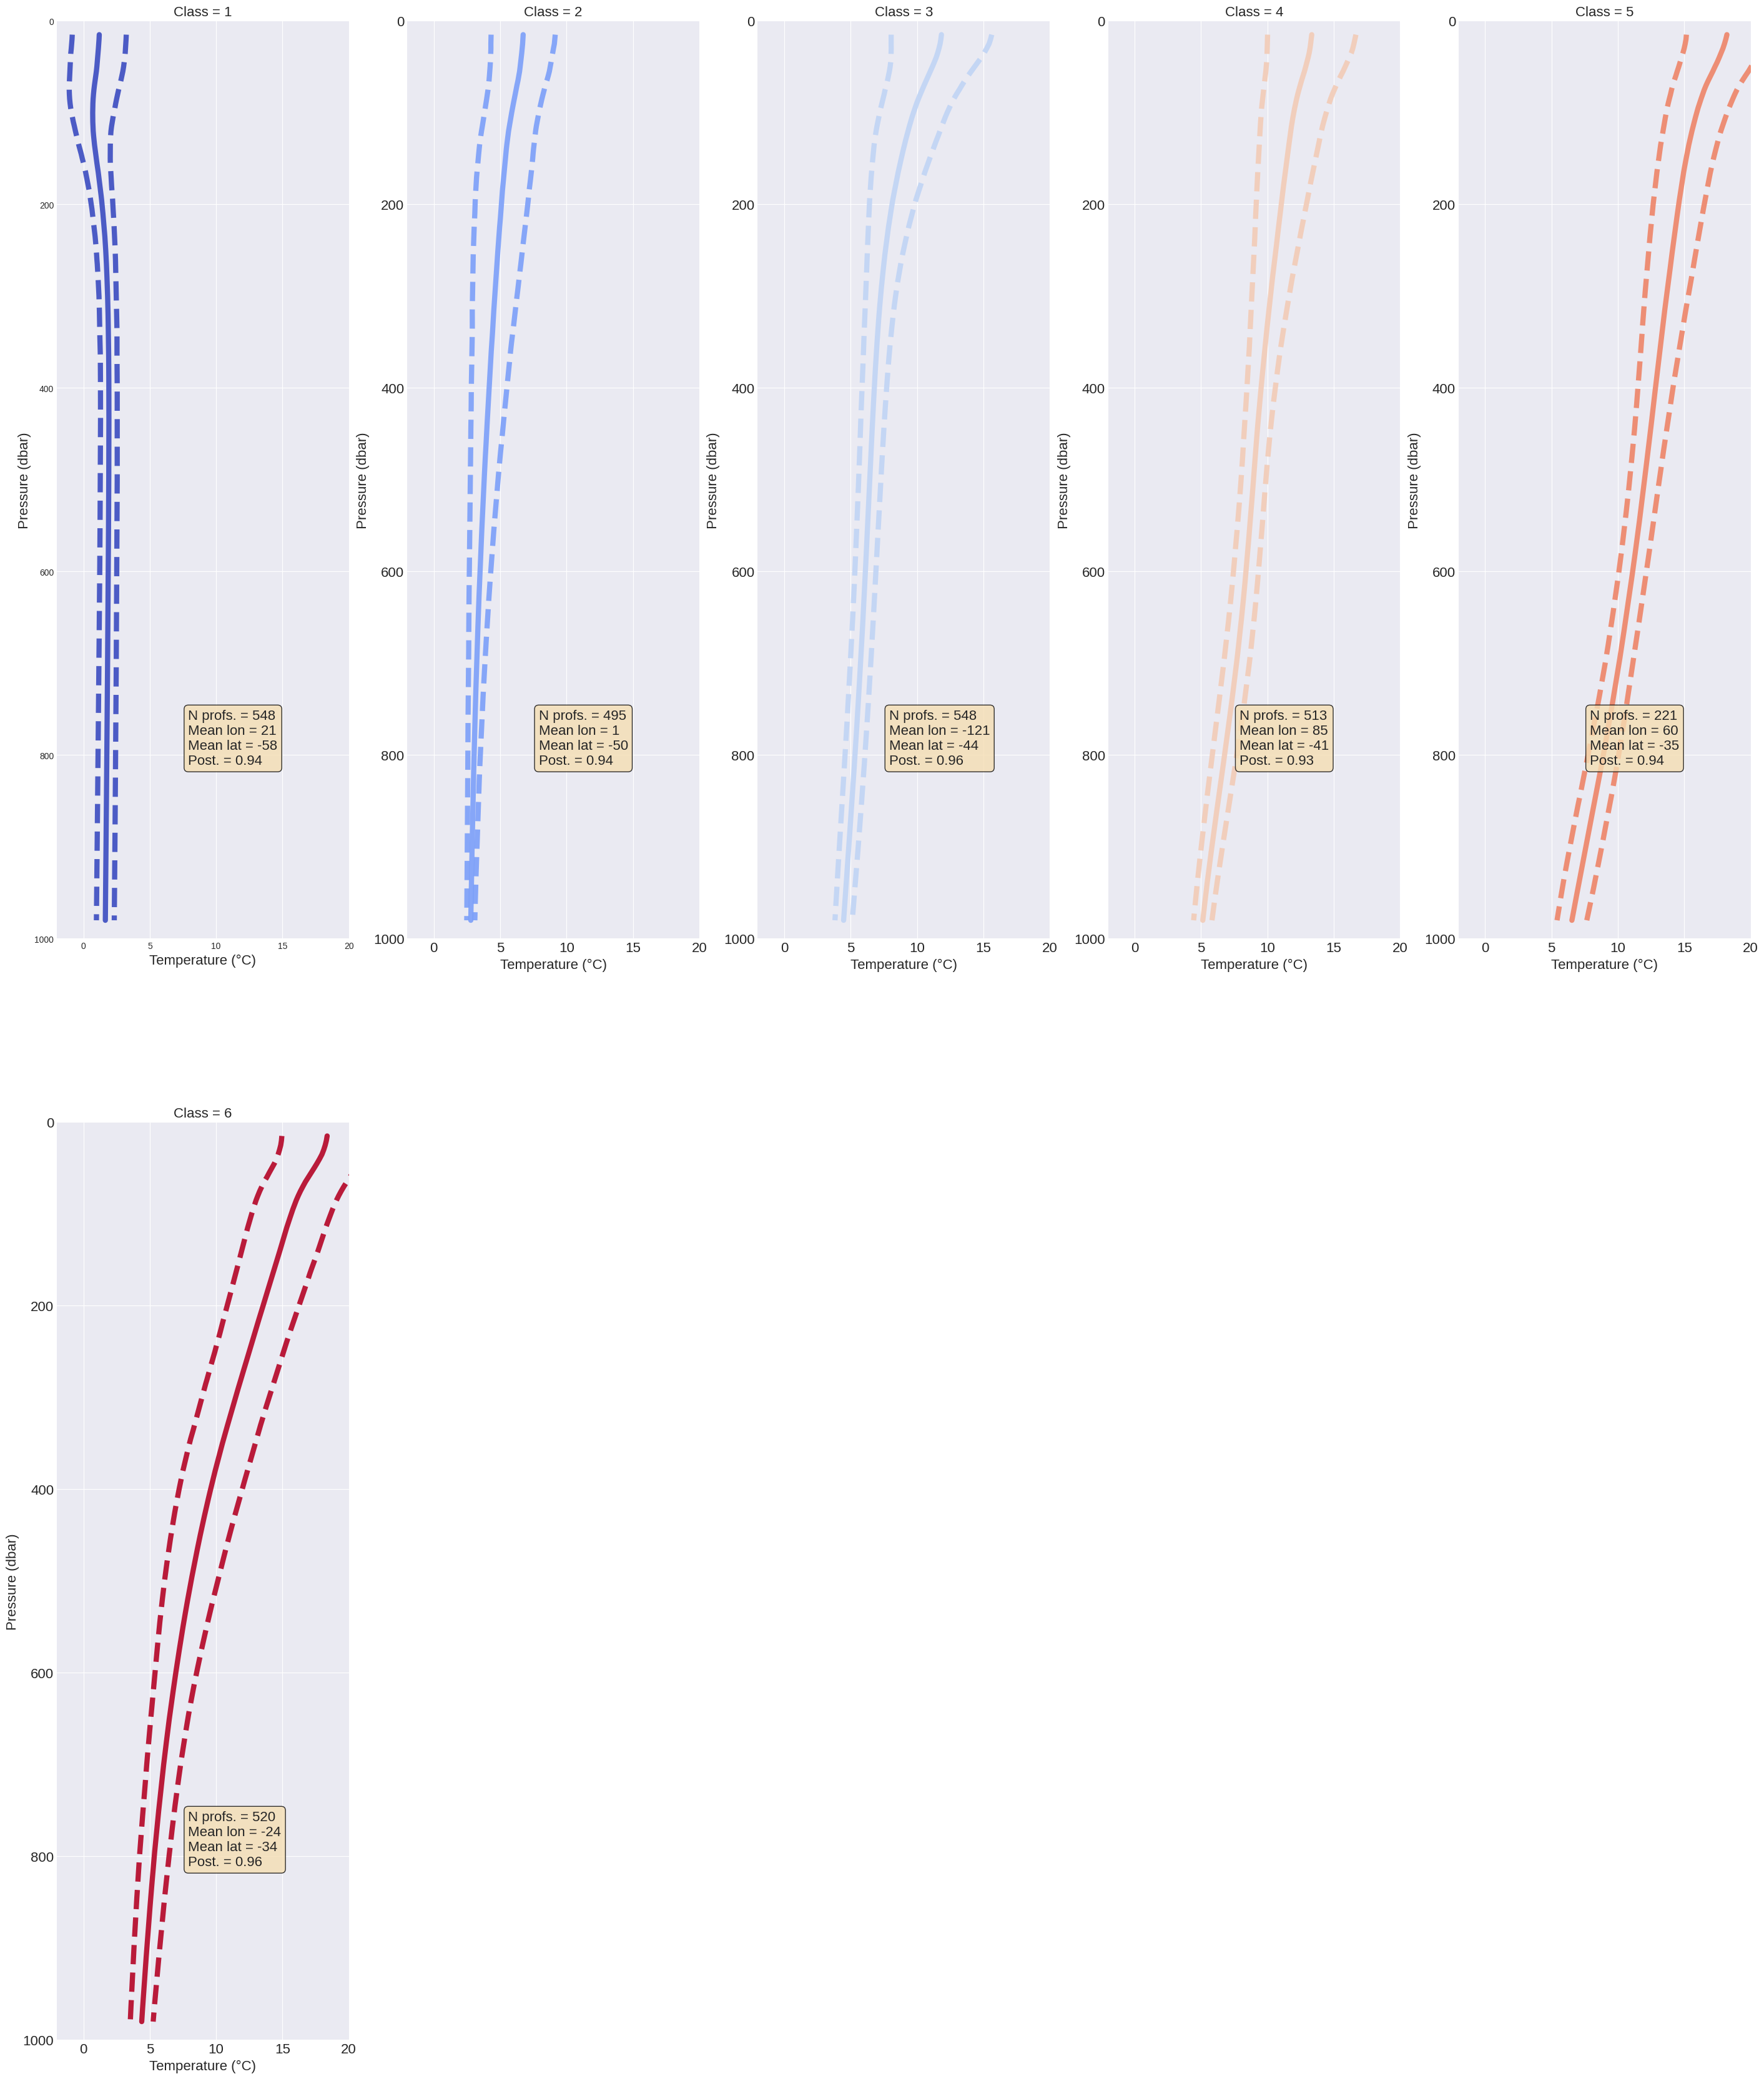

In [37]:
# initialize the figure
plt.figure(figsize=(35, 42))
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = cm.coolwarm(np.linspace(0,1,n_comp))

# iterate over groups
num = 0
for nrow in range(0,n_comp):
    num += 1
    
    # extract means
    mean_lon = dfg_means.iloc[nrow,0]
    mean_lat = dfg_means.iloc[nrow,1]
    mean_maxpp = dfg_means.iloc[nrow,3]
    mean_T = dfg_means.iloc[nrow,4:].values
    
    # extract stdevs
    std_lon = dfg_stds.iloc[nrow,0]
    std_lat = dfg_stds.iloc[nrow,1]
    std_maxpp = dfg_stds.iloc[nrow,3]
    std_T = dfg_stds.iloc[nrow,4:].values
    
    # select subplot
    plt.subplot(int(np.ceil(n_comp/5)),5,num)
    plt.plot(mean_T, p, marker='', linestyle='solid', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T+std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T-std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    
    # custom grid and axes
    plt.ylim([0,1000])
    ax = plt.gca()
    ax.invert_yaxis() 
    plt.xlim([-2, 20])
    ax.grid(True)
    
    fs = 16 # font size
    plt.xlabel('Temperature (°C)', fontsize=fs)
    plt.ylabel('Pressure (dbar)', fontsize=fs)
    plt.title('Class = ' + str(num), fontsize=fs)
    mpl.rc('xtick', labelsize=fs)     
    mpl.rc('ytick', labelsize=fs)
    
    # text box
    textstr = '\n'.join((
        r'N profs. = %i' % (nprofs[nrow], ),
        r'Mean lon = %i' % (mean_lon, ),
        r'Mean lat = %i' % (mean_lat, ),
        r'Post. = %.2f' % (mean_maxpp, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    # place a text box in upper left in axes coords
    ax.text(0.45, 0.25, textstr, transform=ax.transAxes, fontsize=fs,
            verticalalignment='top', bbox=props)
    
plt.show()
    

In [76]:
points = []
for i, value in enumerate(mean_T):
    points.append((value-std_T[i], float(pres[i])))
    points.append((value+std_T[i], float(pres[i])))

In [72]:
hull = ConvexHull(points)

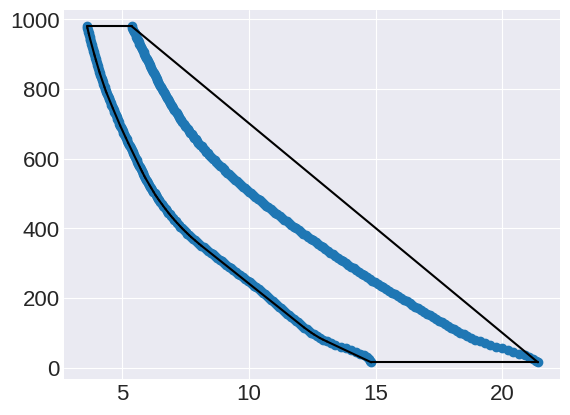

In [73]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [131]:
def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set of points.

    @param points: Iterable container of points.
    @param alpha: alpha value to influence the gooeyness of the border. Smaller
                numbers don't fall inward as much as larger numbers. Too large,
                and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense in computing an alpha
        # shape.
        return geometry.MultiPoint(list(points)).convex_hull

    def add_edge(edges, edge_points, coords, i, j):
        """Add a line between the i-th and j-th points, if not in the list already"""
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add( (i, j) )
        edge_points.append(coords[ [i, j] ])

    coords = np.array([point.coords[0] for point in points])

    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c)/2.0

        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        if area == 0:
            area = 1.000000000154332e-09
        circum_r = a*b*c/(4.0*area)

        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, coords, ia, ib)
            add_edge(edges, edge_points, coords, ib, ic)
            add_edge(edges, edge_points, coords, ic, ia)

    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))

    return cascaded_union(triangles), edge_points

In [153]:
from shapely.ops import cascaded_union, polygonize
import math
import shapely.geometry as geometry
points = []
for i, value in enumerate(mean_T):
    points.append((value-std_T[i], float(pres[i])))
    points.append((value+std_T[i], float(pres[i])))
points_point = [geometry.Point(xy) for xy in points]

In [189]:
concave_hull, edge_points = alpha_shape(points_point, alpha=0.1)

/tmp/ipykernel_50443/2068754762.py:59: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(triangles), edge_points


In [145]:
def plot_polygon(polygon):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3

    x_min, y_min, x_max, y_max = polygon.bounds

    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999', ec='#000000', fill=True, zorder=-1)
    ax.add_patch(patch)
    return fig

In [222]:
points = []
x = []
y = []
for i, value in enumerate(mean_T):
    x.append(value-std_T[i])
    x.append(value+std_T[i])
    y.append(float(pres[i]))
    y.append(float(pres[i]))

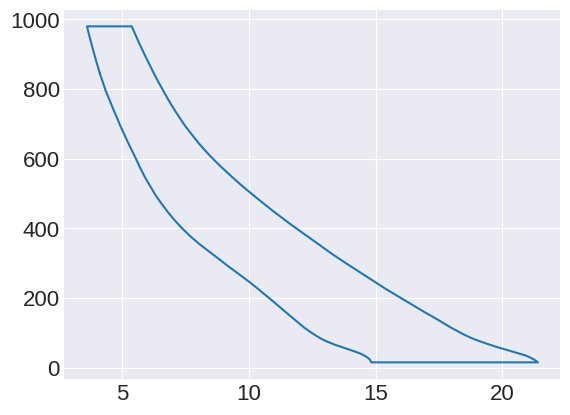

In [227]:
plt.plot(*concave_hull.exterior.xy)
plt.plot(x,y,'o', color='#f16824')

In [72]:
df_1.drop(columns=['x', 'y', 'label', 'label_sorted', 'max posterior prob'], inplace=True)

/tmp/ipykernel_11083/775686674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=['x', 'y', 'label', 'label_sorted', 'max posterior prob'], inplace=True)


In [73]:
# df_1 = df_1.T

In [74]:
df_1.max().max()

18.5499801636

In [75]:
df_1

,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
1,10.326000,10.326000,10.326000,10.326098,10.328574,10.331011,10.331514,10.332000,10.332000,10.331969,...,5.563226,5.486413,5.446694,5.406974,5.367255,5.327535,5.287816,5.248096,5.208376,5.168657
3,9.729325,9.714897,9.688203,9.658428,9.637267,9.616872,9.606910,9.598658,9.585518,9.571149,...,5.321880,5.270394,5.228471,5.188967,5.149464,5.109960,5.070456,5.030951,4.991447,4.951944
8,15.923498,15.878342,15.834440,15.788003,15.733459,15.688824,15.672653,15.659203,15.652769,15.644985,...,7.042489,6.985454,6.916192,6.846930,6.777667,6.708405,6.639143,6.569880,6.500618,6.431356
13,18.302019,18.298420,18.013252,17.728085,17.723549,17.719097,17.710011,17.700005,17.649492,17.601425,...,7.619682,7.537029,7.474188,7.411355,7.348520,7.285686,7.222675,7.150123,7.077571,7.005019
18,15.002315,14.928808,14.609531,14.333694,14.287725,14.226079,14.092669,13.963716,13.868086,13.772892,...,6.688632,6.609244,6.552629,6.496014,6.439398,6.382783,6.326168,6.269553,6.212937,6.156322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,-1.873000,...,0.156529,0.148219,0.145108,0.144000,0.143107,0.143000,0.143000,0.143606,0.142106,0.141000
2824,-1.812005,-1.811500,-1.811996,-1.813000,-1.811999,-1.812000,-1.812000,-1.811000,-1.811000,-1.808506,...,0.597011,0.588502,0.589998,0.648504,0.629036,0.622033,0.612000,0.590004,0.584008,0.582499
2827,-1.853801,-1.854000,-1.853218,-1.853000,-1.852000,-1.852000,-1.851000,-1.851716,-1.849217,-1.847155,...,0.941968,0.930718,0.938781,0.936718,0.932436,0.930718,0.920083,0.918413,0.930349,0.931284
2836,-1.779191,-1.780262,-1.765553,-1.766078,-1.763000,-1.763000,-1.763000,-1.763000,-1.763000,-1.759236,...,0.620000,0.619000,0.614384,0.609000,0.607193,0.604382,0.601192,0.600000,0.599192,0.592383


In [76]:
bins = np.linspace(2.81,24.65, int((24.65-2.81)*100)).round(2)
bins

array([ 2.81,  2.82,  2.83, ..., 24.63, 24.64, 24.65])

In [77]:
df_1_copy = df_1.copy()

In [78]:
for i in df_1.iteritems():
    df_1_copy[i[0]] = pd.cut(i[1], bins)

In [102]:
df_final = pd.DataFrame()


""


In [105]:
df_final.shape

(0, 0)

In [109]:
df_1_copy.columns

Index(['15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0', '55.0',
       '60.0',
       ...
       '935.0', '940.0', '945.0', '950.0', '955.0', '960.0', '965.0', '970.0',
       '975.0', '980.0'],
      dtype='object', length=194)

In [110]:
df_final = pd.DataFrame()
for i in df_1_copy.columns:
    x = df_1_copy[i].value_counts()
    if df_final.shape[0] == 0:
        df_final = x.reset_index()
    else:
        df_final = pd.merge(df_final, x.reset_index(), on='index')

In [115]:
df_final.set_index('index', inplace=True)

In [120]:
df_1_copy

,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
1,"(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]",...,"(5.56, 5.57]","(5.48, 5.49]","(5.44, 5.45]","(5.4, 5.41]","(5.36, 5.37]","(5.32, 5.33]","(5.28, 5.29]","(5.24, 5.25]","(5.2, 5.21]","(5.16, 5.17]"
3,"(9.72, 9.73]","(9.71, 9.72]","(9.68, 9.69]","(9.65, 9.66]","(9.63, 9.64]","(9.61, 9.62]","(9.6, 9.61]","(9.59, 9.6]","(9.58, 9.59]","(9.57, 9.58]",...,"(5.32, 5.33]","(5.27, 5.28]","(5.22, 5.23]","(5.18, 5.19]","(5.14, 5.15]","(5.1, 5.11]","(5.07, 5.08]","(5.03, 5.04]","(4.99, 5.0]","(4.95, 4.96]"
8,"(15.92, 15.93]","(15.87, 15.88]","(15.83, 15.84]","(15.78, 15.79]","(15.73, 15.74]","(15.68, 15.69]","(15.67, 15.68]","(15.65, 15.66]","(15.65, 15.66]","(15.64, 15.65]",...,"(7.04, 7.05]","(6.98, 6.99]","(6.91, 6.92]","(6.84, 6.85]","(6.77, 6.78]","(6.7, 6.71]","(6.63, 6.64]","(6.56, 6.57]","(6.5, 6.51]","(6.43, 6.44]"
13,"(18.3, 18.31]","(18.29, 18.3]","(18.01, 18.02]","(17.72, 17.73]","(17.72, 17.73]","(17.71, 17.72]","(17.71, 17.72]","(17.7, 17.71]","(17.64, 17.65]","(17.6, 17.61]",...,"(7.61, 7.62]","(7.53, 7.54]","(7.47, 7.48]","(7.41, 7.42]","(7.34, 7.35]","(7.28, 7.29]","(7.22, 7.23]","(7.15, 7.16]","(7.07, 7.08]","(7.0, 7.01]"
18,"(15.0, 15.01]","(14.92, 14.93]","(14.6, 14.61]","(14.33, 14.34]","(14.28, 14.29]","(14.22, 14.23]","(14.09, 14.1]","(13.96, 13.97]","(13.86, 13.87]","(13.77, 13.78]",...,"(6.68, 6.69]","(6.6, 6.61]","(6.55, 6.56]","(6.49, 6.5]","(6.43, 6.44]","(6.38, 6.39]","(6.32, 6.33]","(6.26, 6.27]","(6.21, 6.22]","(6.15, 6.16]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
x = df_final.sum(axis=1).to_dict()

In [125]:
for i in df_1_copy.columns:
    print(i)
    df_1_copy[i] = df_1_copy[i].replace(x)

15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0
245.0
250.0
255.0
260.0
265.0
270.0
275.0
280.0
285.0
290.0
295.0
300.0
305.0
310.0
315.0
320.0
325.0
330.0
335.0
340.0
345.0
350.0
355.0
360.0
365.0
370.0
375.0
380.0
385.0
390.0
395.0
400.0
405.0
410.0
415.0
420.0
425.0
430.0
435.0
440.0
445.0
450.0
455.0
460.0
465.0
470.0
475.0
480.0
485.0
490.0
495.0
500.0
505.0
510.0
515.0
520.0
525.0
530.0
535.0
540.0
545.0
550.0
555.0
560.0
565.0
570.0
575.0
580.0
585.0
590.0
595.0
600.0
605.0
610.0
615.0
620.0
625.0
630.0
635.0
640.0
645.0
650.0
655.0
660.0
665.0
670.0
675.0
680.0
685.0
690.0
695.0
700.0
705.0
710.0
715.0
720.0
725.0
730.0
735.0
740.0
745.0
750.0
755.0
760.0
765.0
770.0
775.0
780.0
785.0
790.0
795.0
800.0
805.0
810.0
815.0
820.0
825.0
830.0
835.0
840.0
845.0
850.0
855.0
860

In [126]:
df_1_copy

,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
1,104,104,104,104,104,76,76,76,76,76,...,141,138,156,139,142,153,149,126,149,138
3,88,84,85,73,113,75,87,82,89,91,...,153,128,131,164,176,179,156,121,125,199
8,2,23,12,6,4,5,2,2,2,3,...,100,151,109,131,128,139,130,136,142,107
13,8,7,1,2,2,2,2,1,1,1,...,141,95,153,135,136,143,125,130,130,129
18,5,6,6,4,15,10,11,8,16,7,...,152,128,132,126,107,120,159,101,129,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
y = df_1_copy['20.0'].value_counts()

In [99]:
x.reset_index()

,index,15.0
0,"(6.19, 6.2]",4
1,"(14.74, 14.75]",4
2,"(10.42, 10.43]",3
3,"(6.68, 6.69]",3
4,"(9.94, 9.95]",3
...,...,...
2178,"(11.7, 11.71]",0
2179,"(11.69, 11.7]",0
2180,"(11.68, 11.69]",0
2181,"(11.67, 11.68]",0


,index,15.0,20.0
0,"(6.19, 6.2]",4,2
1,"(14.74, 14.75]",4,2
2,"(10.42, 10.43]",3,4
3,"(6.68, 6.69]",3,2
4,"(9.94, 9.95]",3,2
...,...,...,...
2178,"(11.7, 11.71]",0,0
2179,"(11.69, 11.7]",0,0
2180,"(11.68, 11.69]",0,0
2181,"(11.67, 11.68]",0,0


In [89]:
df_1_copy.value_counts()['(3.76, 3.77]']

KeyError: '(3.76, 3.77]'

In [79]:
for i in df_1.iteritems():
    

,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
1,"(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.32, 10.33]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]","(10.33, 10.34]",...,"(5.56, 5.57]","(5.48, 5.49]","(5.44, 5.45]","(5.4, 5.41]","(5.36, 5.37]","(5.32, 5.33]","(5.28, 5.29]","(5.24, 5.25]","(5.2, 5.21]","(5.16, 5.17]"
3,"(9.72, 9.73]","(9.71, 9.72]","(9.68, 9.69]","(9.65, 9.66]","(9.63, 9.64]","(9.61, 9.62]","(9.6, 9.61]","(9.59, 9.6]","(9.58, 9.59]","(9.57, 9.58]",...,"(5.32, 5.33]","(5.27, 5.28]","(5.22, 5.23]","(5.18, 5.19]","(5.14, 5.15]","(5.1, 5.11]","(5.07, 5.08]","(5.03, 5.04]","(4.99, 5.0]","(4.95, 4.96]"
8,"(15.92, 15.93]","(15.87, 15.88]","(15.83, 15.84]","(15.78, 15.79]","(15.73, 15.74]","(15.68, 15.69]","(15.67, 15.68]","(15.65, 15.66]","(15.65, 15.66]","(15.64, 15.65]",...,"(7.04, 7.05]","(6.98, 6.99]","(6.91, 6.92]","(6.84, 6.85]","(6.77, 6.78]","(6.7, 6.71]","(6.63, 6.64]","(6.56, 6.57]","(6.5, 6.51]","(6.43, 6.44]"
13,"(18.3, 18.31]","(18.29, 18.3]","(18.01, 18.02]","(17.72, 17.73]","(17.72, 17.73]","(17.71, 17.72]","(17.71, 17.72]","(17.7, 17.71]","(17.64, 17.65]","(17.6, 17.61]",...,"(7.61, 7.62]","(7.53, 7.54]","(7.47, 7.48]","(7.41, 7.42]","(7.34, 7.35]","(7.28, 7.29]","(7.22, 7.23]","(7.15, 7.16]","(7.07, 7.08]","(7.0, 7.01]"
18,"(15.0, 15.01]","(14.92, 14.93]","(14.6, 14.61]","(14.33, 14.34]","(14.28, 14.29]","(14.22, 14.23]","(14.09, 14.1]","(13.96, 13.97]","(13.86, 13.87]","(13.77, 13.78]",...,"(6.68, 6.69]","(6.6, 6.61]","(6.55, 6.56]","(6.49, 6.5]","(6.43, 6.44]","(6.38, 6.39]","(6.32, 6.33]","(6.26, 6.27]","(6.21, 6.22]","(6.15, 6.16]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
pd.cut(df_1['15.0'], bins)

182      (10.4, 10.41]
183       (8.66, 8.67]
184     (21.36, 21.37]
185     (20.88, 20.89]
186      (19.79, 19.8]
             ...      
2614    (13.52, 13.53]
2645    (18.05, 18.06]
2646    (18.17, 18.18]
2647     (17.89, 17.9]
2665    (15.74, 15.75]
Name: 15.0, Length: 617, dtype: category
Categories (2183, interval[float64, right]): [(2.81, 2.82] < (2.82, 2.83] < (2.83, 2.84] < (2.84, 2.85] ... (24.61, 24.62] < (24.62, 24.63] < (24.63, 24.64] < (24.64, 24.65]]

In [148]:
df_1.min().min()

2.8395450115200003

In [ ]:
bins = range(0.01,[0, 24., 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=names)

In [135]:
df_1['15.0']

182     10.405910
183      8.662434
184     21.361422
185     20.883802
186     19.792868
          ...    
2614    13.528889
2645    18.050308
2646    18.174461
2647    17.890545
2665    15.746332
Name: 15.0, Length: 617, dtype: float64

<AxesSubplot:ylabel='Density'>

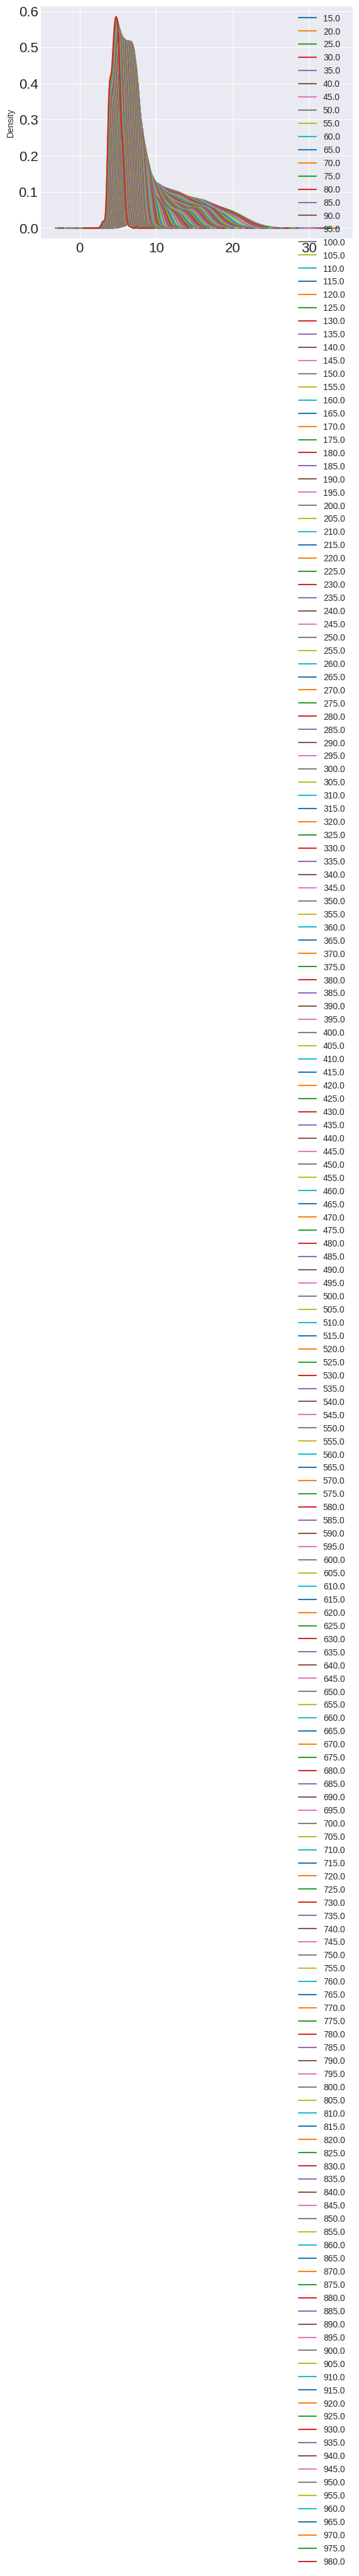

In [126]:
df_1.plot(kind='kde')

In [118]:
from scipy import stats

In [117]:
def plot_kde(x, ax, xlabel, title, color):
    'Creates subplots of kernel density estimations'
    data = shoe_df[x]
    loc = data.mean()
    scale = data.std()
    pdf = stats.norm.pdf(data, loc=loc, scale=scale)
    # Plot pdf as a kde
    ax = sns.kdeplot(x=data, y=pdf, color=color, fill=True, ax=ax)
    # Change face color and grid lines
    ax.set_facecolor('white')
    ax.grid(which='major', linewidth='0.2', color='gray')
    # Set title, x and y labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability Density')

<AxesSubplot:ylabel='Density'>

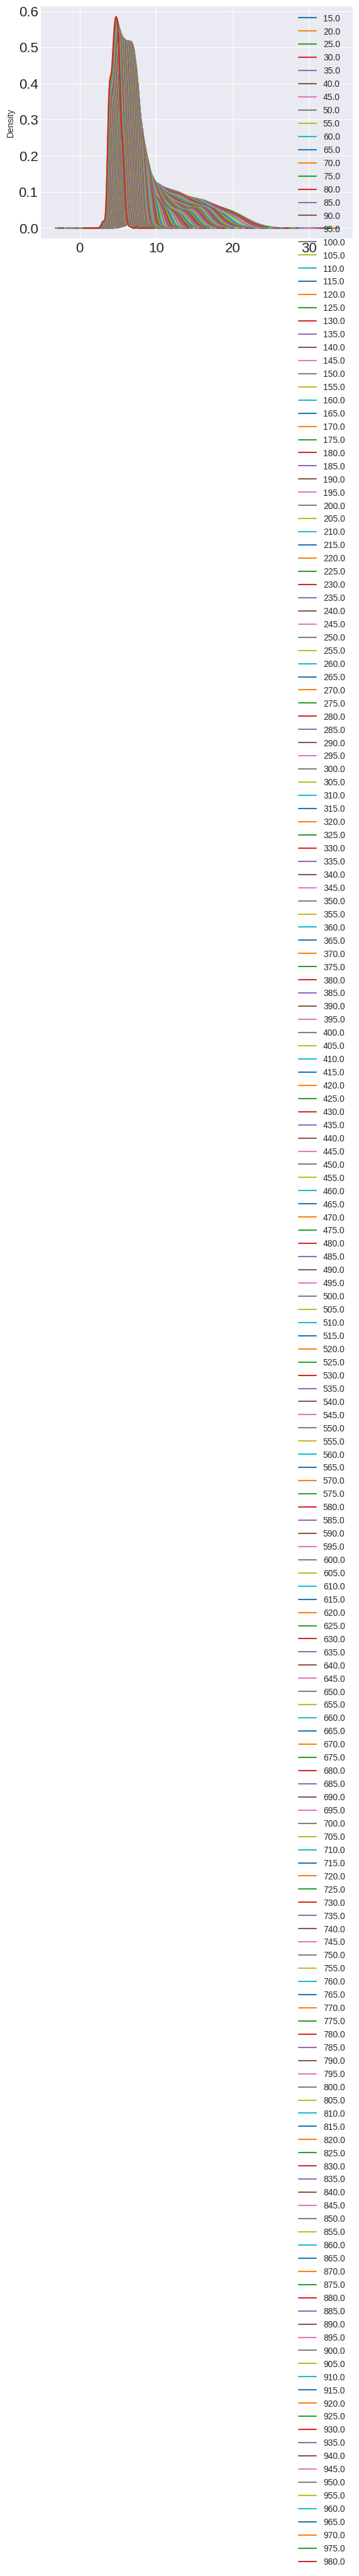

In [124]:
df_1.plot.density()

In [95]:
for i in df_1.iteritems():
    print(i[0])

15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0
245.0
250.0
255.0
260.0
265.0
270.0
275.0
280.0
285.0
290.0
295.0
300.0
305.0
310.0
315.0
320.0
325.0
330.0
335.0
340.0
345.0
350.0
355.0
360.0
365.0
370.0
375.0
380.0
385.0
390.0
395.0
400.0
405.0
410.0
415.0
420.0
425.0
430.0
435.0
440.0
445.0
450.0
455.0
460.0
465.0
470.0
475.0
480.0
485.0
490.0
495.0
500.0
505.0
510.0
515.0
520.0
525.0
530.0
535.0
540.0
545.0
550.0
555.0
560.0
565.0
570.0
575.0
580.0
585.0
590.0
595.0
600.0
605.0
610.0
615.0
620.0
625.0
630.0
635.0
640.0
645.0
650.0
655.0
660.0
665.0
670.0
675.0
680.0
685.0
690.0
695.0
700.0
705.0
710.0
715.0
720.0
725.0
730.0
735.0
740.0
745.0
750.0
755.0
760.0
765.0
770.0
775.0
780.0
785.0
790.0
795.0
800.0
805.0
810.0
815.0
820.0
825.0
830.0
835.0
840.0
845.0
850.0
855.0
860

In [88]:
for row in df_1.iteritems():
    

('x', 2        89.600998
4        64.942001
6       109.463997
7       135.981995
21       36.640000
           ...    
2837     90.356142
2839     99.872000
2842    138.729000
2843     82.050000
2844    165.021000
Name: x, Length: 543, dtype: float64)
('y', 2      -56.223000
4      -50.344002
6      -53.396999
7      -56.949001
21     -49.727000
          ...    
2837   -64.524545
2839   -55.721000
2842   -63.489000
2843   -61.522000
2844   -61.051000
Name: y, Length: 543, dtype: float64)
('label', 2       1
4       1
6       1
7       1
21      1
       ..
2837    1
2839    1
2842    1
2843    1
2844    1
Name: label, Length: 543, dtype: int64)
('label_sorted', 2       0
4       0
6       0
7       0
21      0
       ..
2837    0
2839    0
2842    0
2843    0
2844    0
Name: label_sorted, Length: 543, dtype: int64)
('max posterior prob', 2       0.996009
4       0.850861
6       0.997966
7       0.987718
21      0.518286
          ...   
2837    0.999999
2839    0.999965
2842    0.99

In [42]:
(X_proj.std()**2 / ((Xscaled.std()**2).sum())).cumsum()

PC1      181.084007
PC2      190.415788
PC3      192.791161
PC4      193.409375
PC5      193.705946
            ...    
PC190    194.068212
PC191    194.068213
PC192    194.068213
PC193    194.068213
PC194    194.068214
Length: 194, dtype: float64

In [ ]:
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W
Out[ ]:


In [ ]:
Xpca = pca.transform(Xscaled)

In [12]:
pca = PCA(n_components=6)

# fit PCA model
pca.fit(Xscaled)

# transform input data into PCA representation
Xpca = pca.transform(Xscaled)

array([[ 5.68123674,  5.68384171,  5.60383606, ...,  2.48732376,
         2.48653626,  2.48574901],
       [10.32600021, 10.32600021, 10.32600021, ...,  5.24809599,
         5.20837641,  5.1686573 ],
       [ 2.38345504,  2.38105106,  2.38396597, ...,  1.91830266,
         1.91261363,  1.90692449],
       ...,
       [-0.47515792, -0.50051624, -0.51711047, ...,  1.52292931,
         1.51723385,  1.51090097],
       [-0.20231874, -0.38011235, -0.4662843 , ...,  1.44369078,
         1.43938088,  1.4356935 ],
       [ 2.69401789,  2.69631982,  2.69360018, ...,  1.71192706,
         1.70453584,  1.70299995]])